# Phase-I Pixel detector: Efficiency Measurements
The purpose of this notebook is to provide documentation and validation of the efficiency measurements.

## Tools used
The PhaseIPixelNtuplizer package (used to process the CMSSW output) is available at:

https://github.com/jkarancs/PhaseIPixelNtuplizer

The PhaseIEfficiencyPlotter package (used to create plots) is available at:

https://github.com/hunyadix/PhaseIEfficiencyPlotter

## Input used for the efficiency measurements

For input I generated a RECO -> PhaseIPixelNtuplizer -> PhaseIEfficiencyPlotter ntuple with
<ul>
<li> 50,000 events, </li>
<li> in both CMSSW 90X and CMSSW 91X,
<li> with the value of 0.8 set as double column efficiciency for all the detector parts </li>
</ul>

to validate the efficiency measurements and to fine-tune the efficiency filter cut thresholds.

The loading of the toolkit, and opening of the input file is done here:

In [1]:
import ROOT, sys
sys.path.append('../python/')
inputFile = ROOT.TFile.Open("/data_ssd_120gb/hunyadi/CMSSW/PhaseIEfficiencyPlotter_2017_04_02/CMSSW_9_1_0_pre3/src/DPGAnalysis/PhaseIEfficiencyPlotter/histograms_9_0_0.root", "READ")

## Validation - Basics and drawing tools
The plotter code should have generated a directory system with different directories based on the conditions. Since the ntuple only contains data from the same kind of simulation, it should only have one main directory:

In [2]:
mainDir = ROOT.gDirectory.Get(
    ROOT.gDirectory.GetListOfKeys().First().GetTitle())

The file contains categorical plot type subdirectories. This is the list of all the categories:

In [3]:
for index, subDir in enumerate(mainDir.GetListOfKeys()):
    sys.stdout.write("%-35s " % subDir.GetTitle())
    if index % 3 == 2: print ""

layersDisksEfficiencyPlots          rechitOccupancyROCPlots             efficiencyROCPlots                  
rechitOccupancyPhiVsZPlots          efficiencyPhiVsZPlots               rechitOccupancyGlyVsGlxPlots        
efficiencyGlyVsGlxPlots             vtxNtrkEfficiencyPreCutsPlots       vtxNtrkEfficiencyWithCutsPlots      
ptEfficiencyPreCutsPlots            ptEfficiencyWithCutsPlots           striphitsEfficiencyPreCutsPlots     
striphitsEfficiencyWithCutsPlots    lxEfficiencyPreCutsPlots            lxEfficiencyWithCutsPlots           
lyEfficiencyPreCutsPlots            lyEfficiencyWithCutsPlots           lyVsLxEfficiencyPreCutsPlots        
lyVsLxEfficiencyWithCutsPlots       clustDistPreCutsPlots               clustDistWithCutsPlots              
hitDistPreCuts                      hitDistWithCutsPlots                d0PreCutsPlots                      
d0WithCutsPlots                     dzPreCutsPlots                      dzWithCutsPlots                     
rocEfficiencyDistri

To draw the contents of these categories, a drawing tool is introduced here:

In [4]:
def createTwoByNCanvas(name, title, width, height, plotDirectory, plotNames):
    canvas = ROOT.TCanvas(name, title, width, height)
    canvas.Divide(2, int((len(plotNames) + 1) / 2))
    for index, plotName in enumerate(plotNames):
        canvas.cd(index + 1)
        plot = ROOT.gDirectory.Get(plotDirectory + "/" + plotName)
        if plot: plot.Draw("COLZ")
        else: print "Missing plot: ", plotName
    return canvas

The visualization of the canvases can be customized here: 

In [5]:
# ROOT.enableJSVis() # Uncommenting this adds interactive html/javascript elements to the notebook
ROOT.gStyle.SetPalette(1)

## Validation - Plots

### Cluster occupancy on the ROCs

Missing plot:  clusterOccupancyROCPlots_Layer1
Missing plot:  clusterOccupancyROCPlots_Layer2
Missing plot:  clusterOccupancyROCPlots_Layer3
Missing plot:  clusterOccupancyROCPlots_Layer4
Missing plot:  clusterOccupancyROCPlots_AllDisks


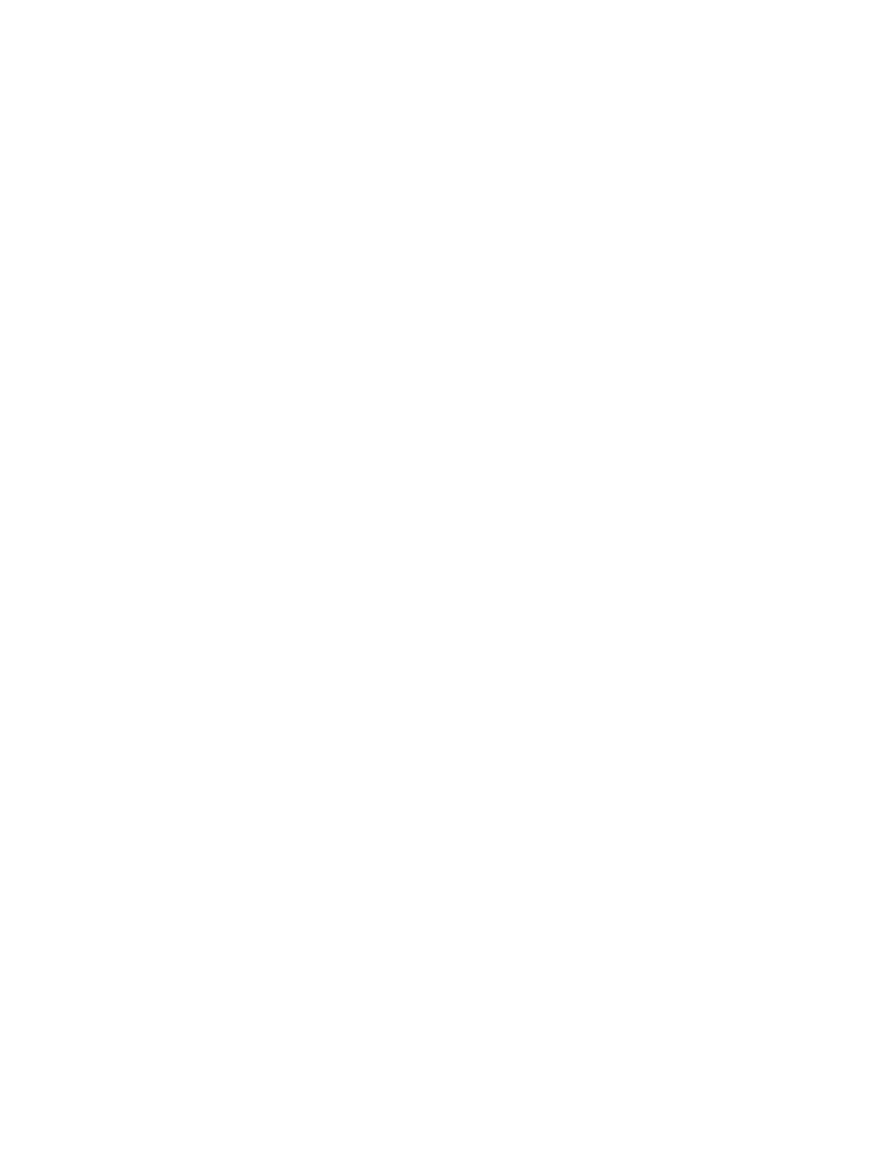

In [6]:
canvas = createTwoByNCanvas("ClusterOccupancyCanvas", "Cluster Occupancy on the ROCs", 900, 1200,
                   mainDir.GetTitle() + "/" + "clusterOccupancyROCPlots",
                   ["clusterOccupancyROCPlots_Layer1",
                    "clusterOccupancyROCPlots_Layer2",
                    "clusterOccupancyROCPlots_Layer3",
                    "clusterOccupancyROCPlots_Layer4",
                    "clusterOccupancyROCPlots_AllDisks"])
canvas.Draw()

### Cluster occupancy on the layers - phi vs Z

Missing plot:  clusterPhiVsZPlots_Layer1
Missing plot:  clusterPhiVsZPlots_Layer2
Missing plot:  clusterPhiVsZPlots_Layer2
Missing plot:  clusterPhiVsZPlots_Layer4


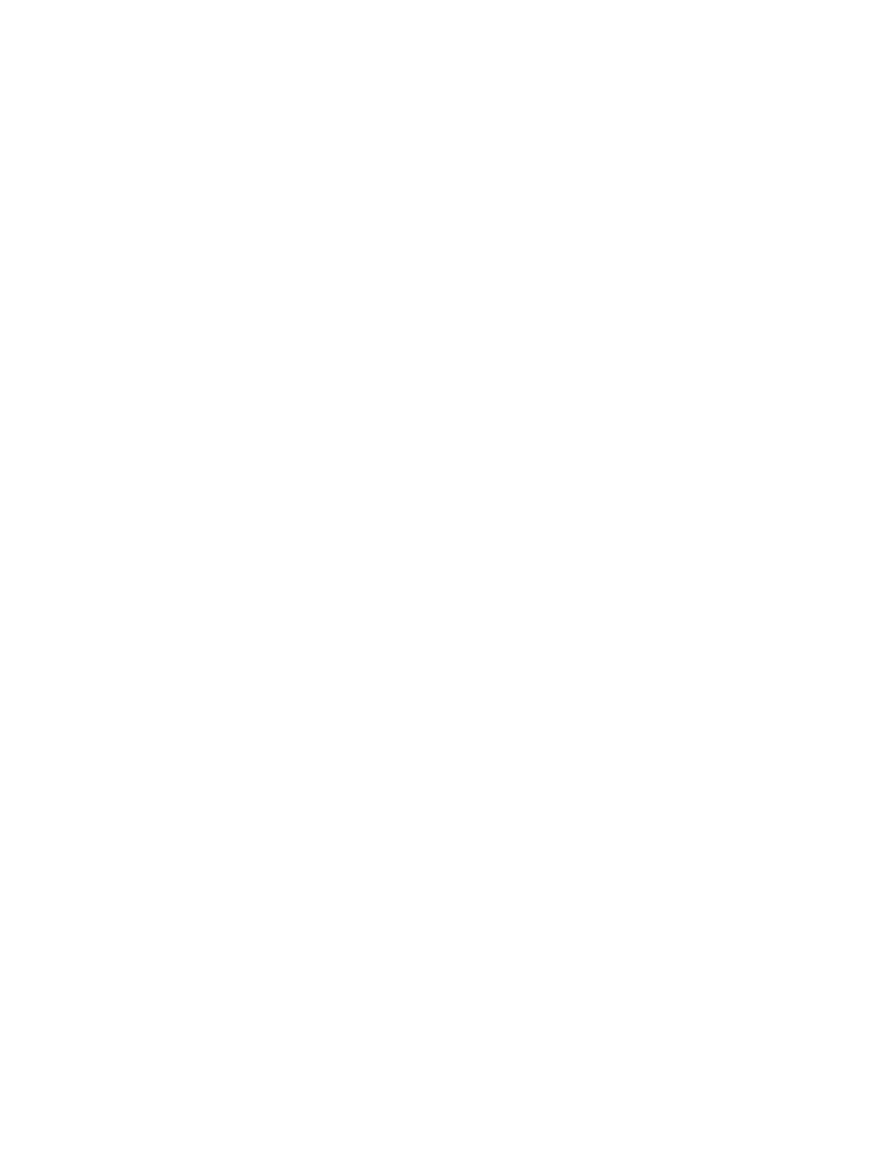

In [7]:
canvas = createTwoByNCanvas("ClusterPhiVsZCanvas", "Cluster occupancy, phi vs Z", 900, 1200,
                   mainDir.GetTitle() + "/" + "clusterPhiVsZPlots",
                   ["clusterPhiVsZPlots_Layer1",
                    "clusterPhiVsZPlots_Layer2",
                    "clusterPhiVsZPlots_Layer2",
                    "clusterPhiVsZPlots_Layer4"])
canvas.Draw()

### Cluster occupancy on the layers - phi vs Z

Missing plot:  clusterGlyVsGlxPlots_Disk1
Missing plot:  clusterGlyVsGlxPlots_Disk2
Missing plot:  clusterGlyVsGlxPlots_Disk3
Missing plot:  clusterGlyVsGlxPlots_Disk4
Missing plot:  clusterGlyVsGlxPlots_Disk5
Missing plot:  clusterGlyVsGlxPlots_Disk6


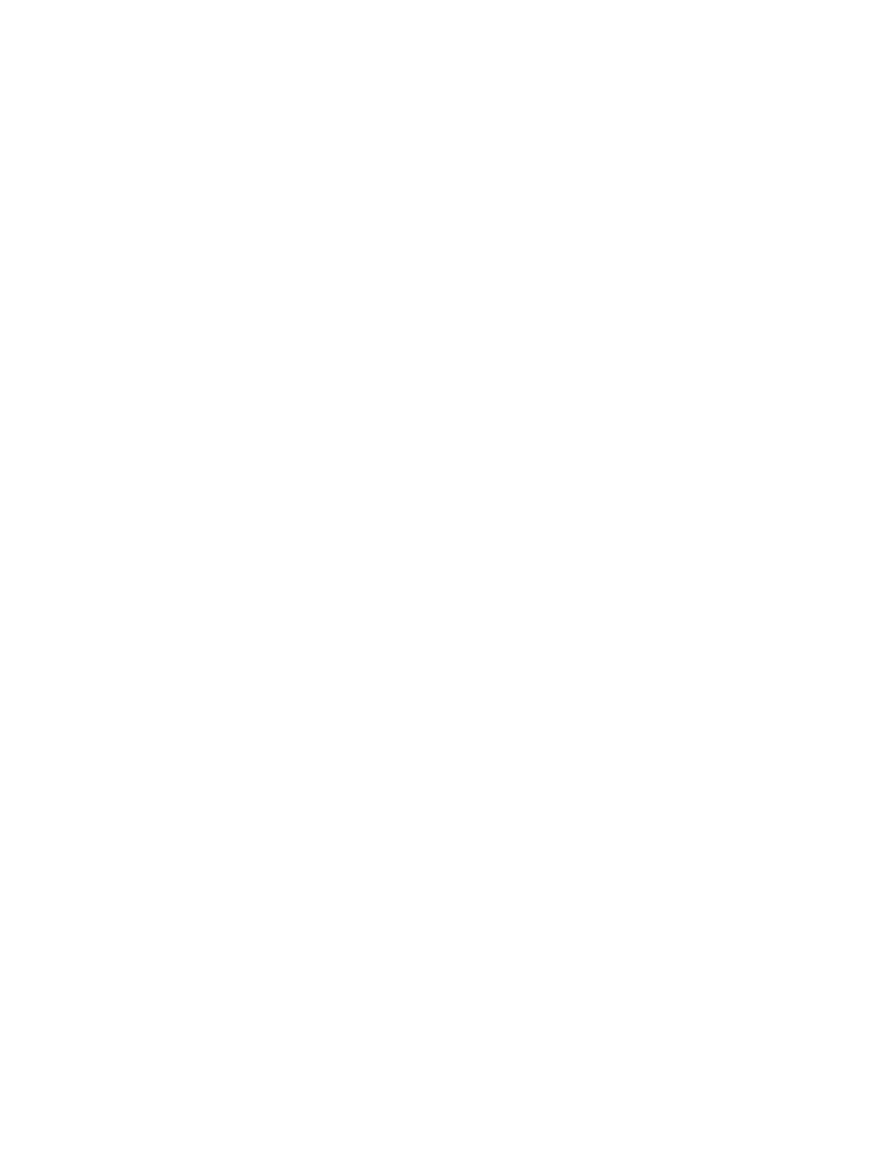

In [8]:
canvas = createTwoByNCanvas("ClusterGlyVsGlxCanvas", "Cluster occupancy, Y vs X", 900, 1200,
                   mainDir.GetTitle() + "/" + "clusterGlyVsGlxPlots",
                   ["clusterGlyVsGlxPlots_Disk1",
                    "clusterGlyVsGlxPlots_Disk2",
                    "clusterGlyVsGlxPlots_Disk3",
                    "clusterGlyVsGlxPlots_Disk4",
                    "clusterGlyVsGlxPlots_Disk5",
                    "clusterGlyVsGlxPlots_Disk6"])
canvas.Draw()

### Rechit occupancy on the ROCs

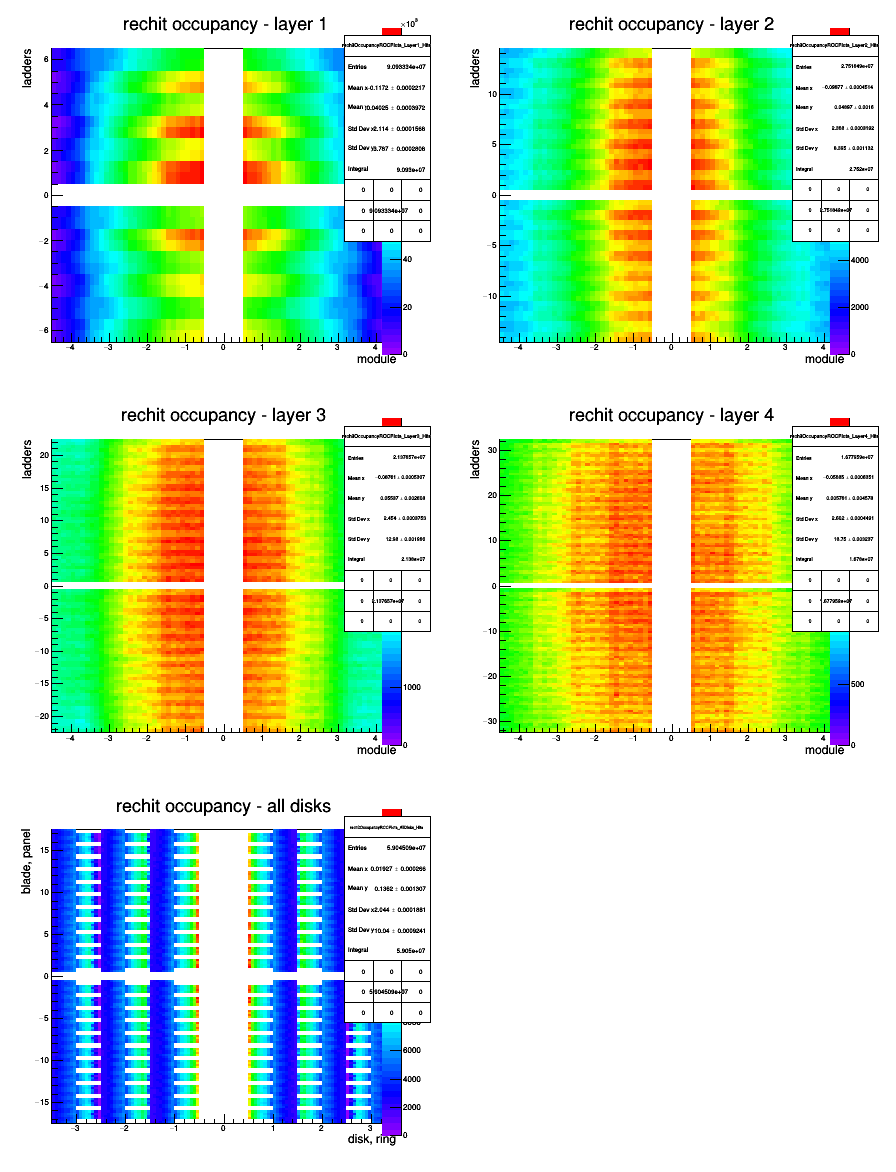

In [9]:
canvas = createTwoByNCanvas("RechitOccupancyCanvas", "Rechit Occupancy on the ROCs", 900, 1200,
                   mainDir.GetTitle() + "/" + "rechitOccupancyROCPlots",
                   ["rechitOccupancyROCPlots_Layer1_Hits",
                    "rechitOccupancyROCPlots_Layer2_Hits",
                    "rechitOccupancyROCPlots_Layer3_Hits",
                    "rechitOccupancyROCPlots_Layer4_Hits",
                    "rechitOccupancyROCPlots_AllDisks_Hits"])
canvas.Draw()

### Rechit occupancy on the ROCs

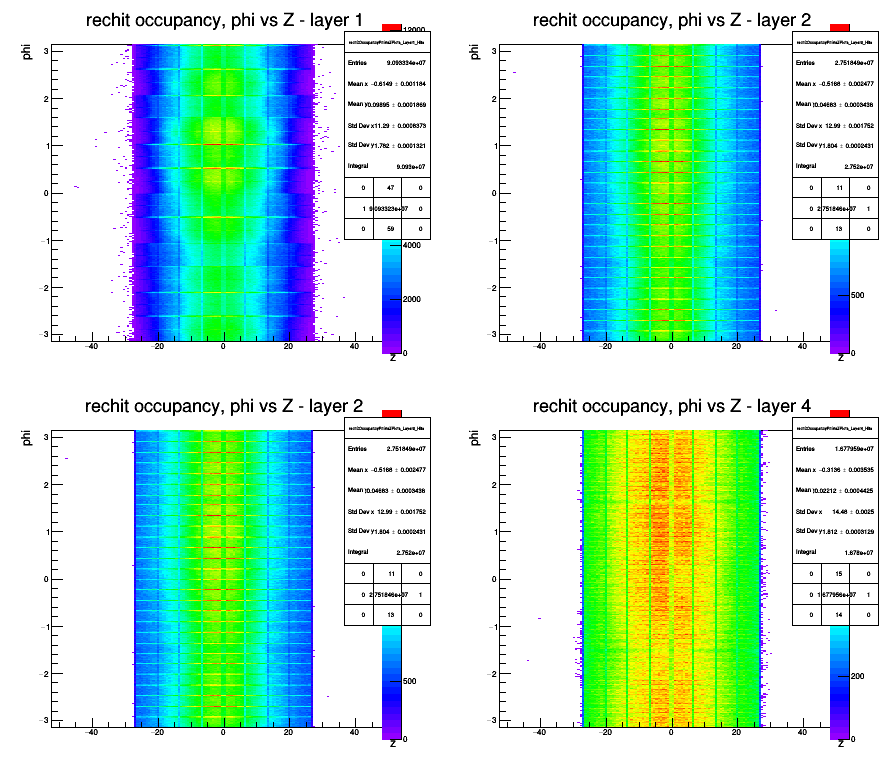

In [10]:
canvas = createTwoByNCanvas("rechitOccupancyPhiVsZCanvas", "Rechit occupancy, phi vs Z", 900, 800,
                   mainDir.GetTitle() + "/" + "rechitOccupancyPhiVsZPlots",
                   ["rechitOccupancyPhiVsZPlots_Layer1_Hits",
                    "rechitOccupancyPhiVsZPlots_Layer2_Hits",
                    "rechitOccupancyPhiVsZPlots_Layer2_Hits",
                    "rechitOccupancyPhiVsZPlots_Layer4_Hits"])
canvas.Draw()

### Rechit occupancy on the disks - Y vs X

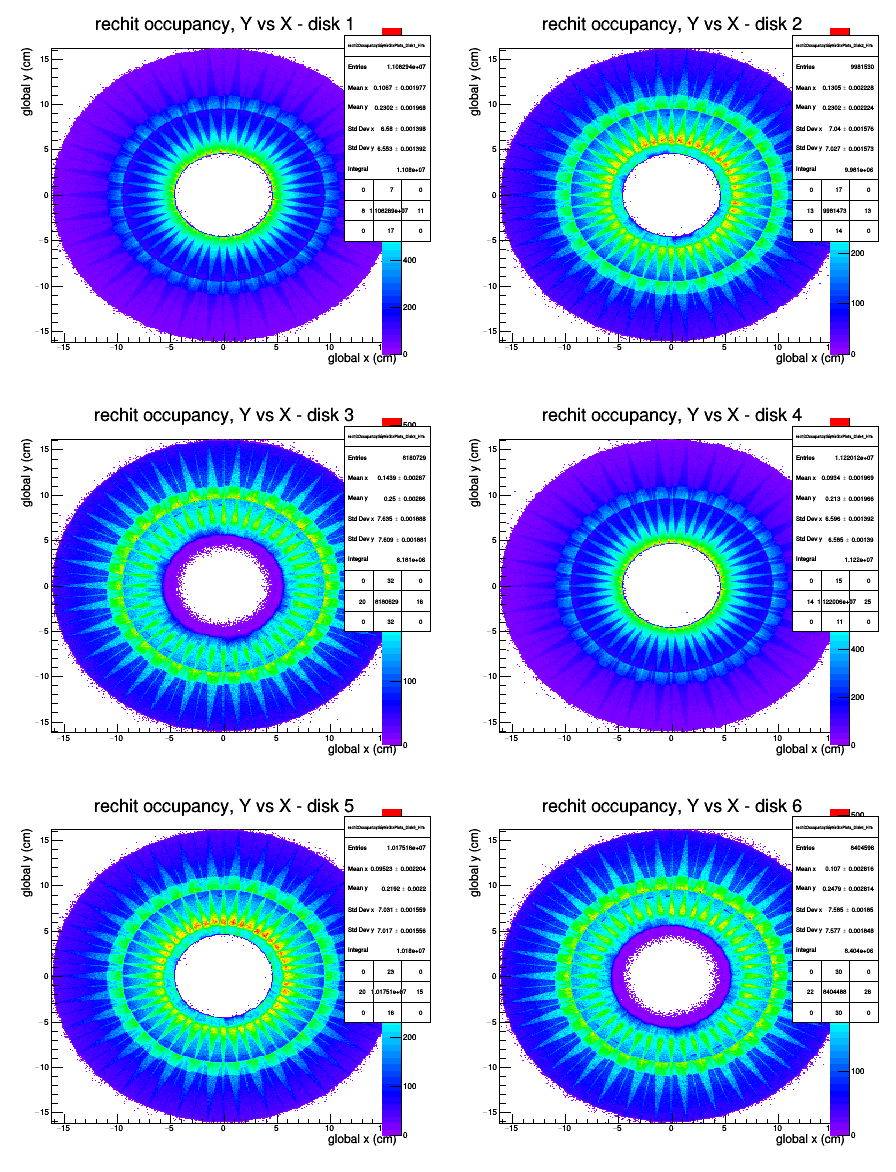

In [11]:
canvas = createTwoByNCanvas("RechitOccupancyGlyVsGlxCanvas", "Rechit occupancy, Y vs X", 900, 1200,
                   mainDir.GetTitle() + "/" + "rechitOccupancyGlyVsGlxPlots",
                   ["rechitOccupancyGlyVsGlxPlots_Disk1_Hits",
                    "rechitOccupancyGlyVsGlxPlots_Disk2_Hits",
                    "rechitOccupancyGlyVsGlxPlots_Disk3_Hits",
                    "rechitOccupancyGlyVsGlxPlots_Disk4_Hits",
                    "rechitOccupancyGlyVsGlxPlots_Disk5_Hits",
                    "rechitOccupancyGlyVsGlxPlots_Disk6_Hits"])
canvas.Draw()

## Efficiency filter cut thresholds - n - 1 plots

The list of the cuts and their functions are listed here:

<table style="
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;">
  <tr>
    <th>#</th>
    <th>Cut name</th>
    <th>Function</th>
  </tr>
   <tr>
   	<td>1</td>
    <td>nvtxCut</td>
    <td>Discards tracks that come from a vertex with low number of tracks.</td>
  </tr>
   <tr>
   	<td>2</td>
    <td>zerobiasCut</td>
    <td>Discards trajectory measurements that come from non MinBias trigger selection (for data).</td>
  </tr>
   <tr>
   	<td>3</td>
    <td>federrCut</td>
    <td>Discards data when FED errors were present.</td>
  </tr>
   <tr>
   	<td>4</td>
    <td>hpCut</td>
    <td>Allows high-purity tracks only.</td>
  </tr>
   <tr>
   	<td>5</td>
    <td>ptCut</td>
    <td>Minimum track transverse momenta.</td>
  </tr>
   <tr>
   	<td>6</td>
    <td>nstripCut</td>
    <td>Number of strip hits required to validate the track presence.</td>
  </tr>
   <tr>
   	<td>7</td>
    <td>d0Cut</td>
    <td>Maximum track-vertex XY distance.</td>
  </tr>
   <tr>
   	<td>8</td>
    <td>dzCut</td>
    <td>Maximum track-vertex Z distance.</td>
  </tr>
   <tr>
   	<td>9</td>
    <td>pixhitCut</td>
    <td>Discards measurements with positions that have been propagated without a validhit in the adjacent detector layers/disks.</td>
  </tr>
   <tr>
   	<td>10</td>
    <td>lxFidCut</td>
    <td>Discards hits on the edges of the modules. For the forward section this is combined with the lyFidCut.</td>
  </tr>
   <tr>
   	<td>11</td>
    <td>lyFidCut</td>
    <td>Discards hits on the edges of the modules. For the forward section this is combined with the lxFidCut.</td>
  </tr>
   <tr>
   	<td>12</td>
    <td>valmisCut</td>
    <td>Discarding hits with invalid states.</td>
  </tr>
   <tr>
   	<td>13</td>
    <td>hitsepCut</td>
    <td>Discarding hits that have ambiguous track assignments (= there are more than one track traversing the detector near the hit).</td>
  </tr>
   <tr>
   	<td>14</td>
    <td>badROCCut</td>
    <td>Excluding non functioning modules and ROCs.</td>
  </tr>
</table>


Many of these cuts have different boundaries than the ones used in the Phase-0 scenario. 

The fine-tuning of the cut values was an iterative process. In order to fine tune a single threshold, the other cuts should be present. The plots with all except one cut values pre-set are referred to as n - 1 plots. I used the Phase-0 cut values as the starting points of the iterations, where it was reasonable to do so.

### Fidicual cuts

#### The Pixel Barrel layers
Since the geometry of the detector is completely different, it is reasonable to start the fine tuning on the most geometry dependent cuts: the fidicual cuts. The scenario of the barrel modules is relatively straightforward:

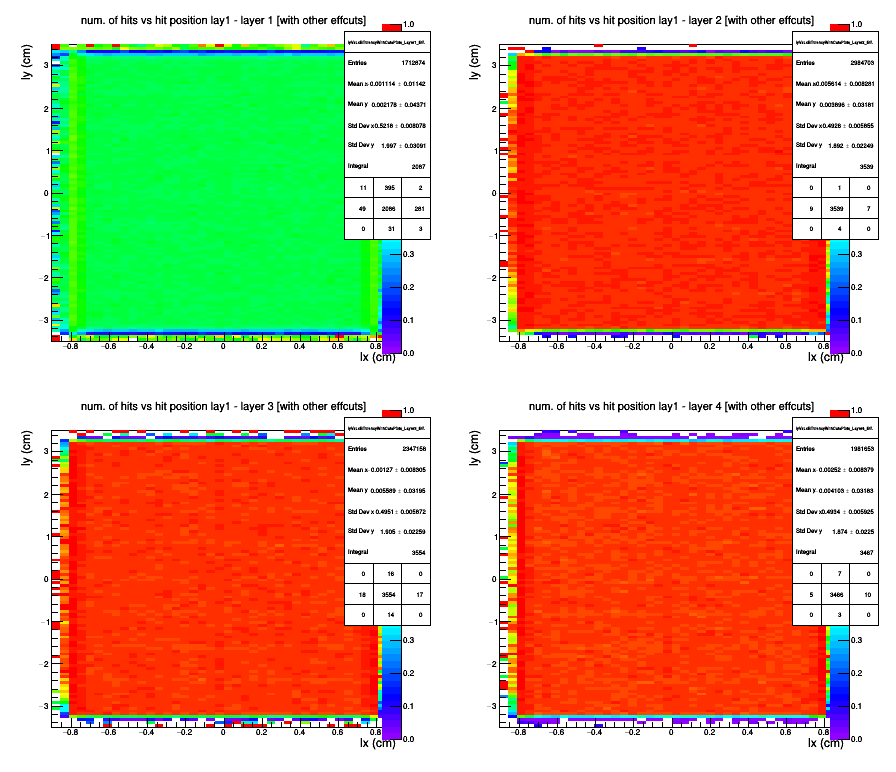

In [12]:
canvas = createTwoByNCanvas("lyVsLxEfficiencyOnTheBarrelCanvas", "Ly vs lx efficiency on the barrel layers", 900, 800,
                   mainDir.GetTitle() + "/" + "lyVsLxEfficiencyWithCutsPlots",
                   ["lyVsLxEfficiencyWithCutsPlots_Layer1_Eff.",
                    "lyVsLxEfficiencyWithCutsPlots_Layer2_Eff.",
                    "lyVsLxEfficiencyWithCutsPlots_Layer3_Eff.",
                    "lyVsLxEfficiencyWithCutsPlots_Layer4_Eff."])
canvas.Draw()

#### The Pixel Endcap modules
As for the modules on the Pixel Endcaps, it is a completely different matter. Unfortunately, there are lots of different configurations for these modules for which the overlapping areas are completely different. As of the current state of the efficiency measurements, only the center of the forward modules were used, since this is the only place, where there are no overlaps between the adjacent modules. Unfortunately, this is a quite small proportion of the modules, so these cuts throw away most of the endcap trajectory measurements.

If you have any ideas how this approach can be upgraded/replaced, please make sure to comment on the matter! :)

For the orientation of the forward modules, 24 differerent scenarios were separated, and an area with correct efficiency measurement values were selected for each of them. Here I present only some of these cuts. The plots on the left side show the total n - 1 efficiencies. The plots on the right side present the efficiency values on the selected area only.

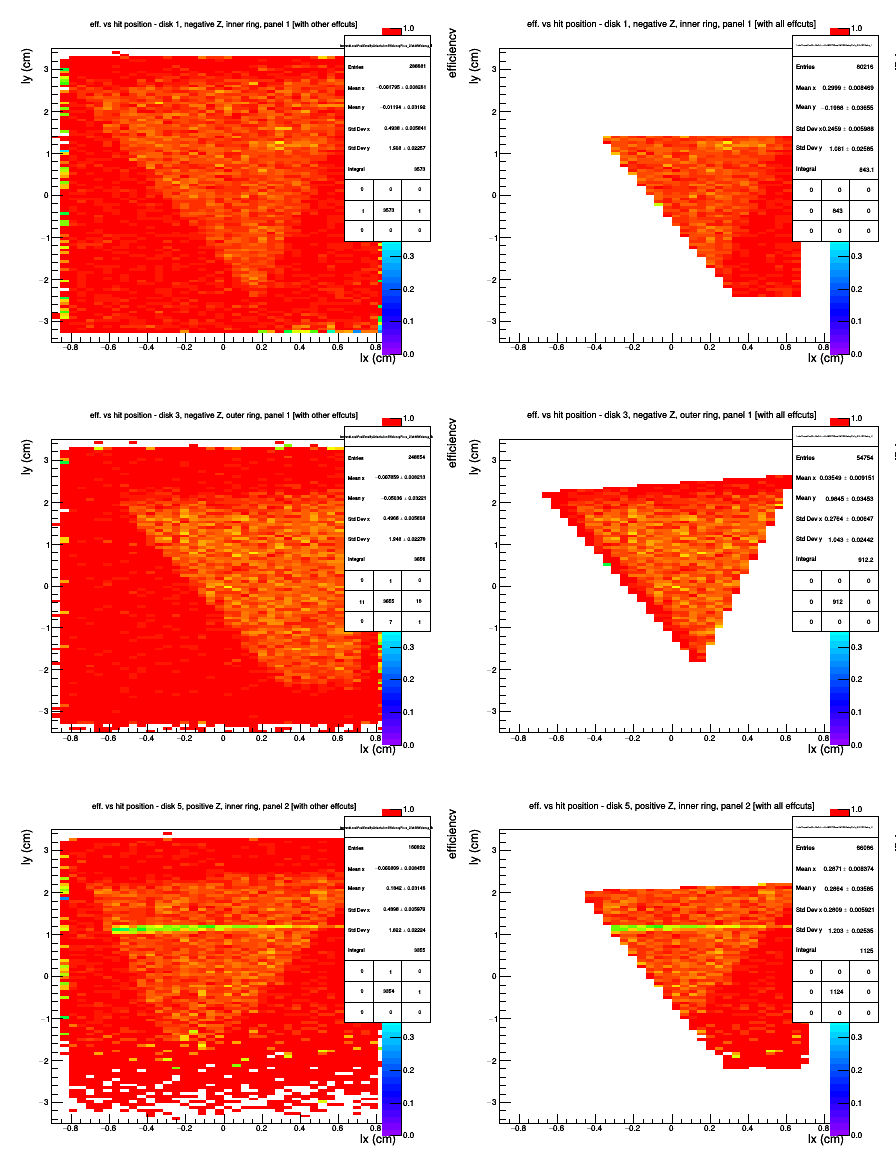

In [13]:
preCutsNamePrefix  = "forwardLocalPositionsByOrientationEfficiencyPlots"
postCutsNamePrefix = "forwardLocalPositionsByOrientationWithFidicualCutsEfficiencyPlots"
canvas = createTwoByNCanvas("lyVsLxEfficiencyOnTheEndcapCanvas", "Ly vs lx efficiency on the endcap disks", 900, 1200,
                   mainDir.GetTitle(),
                   ["forwardLocalPositionsByOrientationEfficiencyPlots/"    + preCutsNamePrefix  + "_Disk1Efficiency_1",
                    "forwardLocalPositionsWithFidicualCutsEfficiencyPlots/" + postCutsNamePrefix + "_Disk1Efficiency_1",
                    "forwardLocalPositionsByOrientationEfficiencyPlots/"    + preCutsNamePrefix  + "_Disk3Efficiency_3",
                    "forwardLocalPositionsWithFidicualCutsEfficiencyPlots/" + postCutsNamePrefix + "_Disk3Efficiency_3",
                    "forwardLocalPositionsByOrientationEfficiencyPlots/"    + preCutsNamePrefix  + "_Disk5Efficiency_6",
                    "forwardLocalPositionsWithFidicualCutsEfficiencyPlots/" + postCutsNamePrefix + "_Disk5Efficiency_6",])
canvas.Draw()

### Cut for number of tracks in the vertices

As for this cut, it was already introduced in the implementation of the PhaseIPixelNtuplizer. The cut value of 10 tracks seems to be perfectly reasonable.

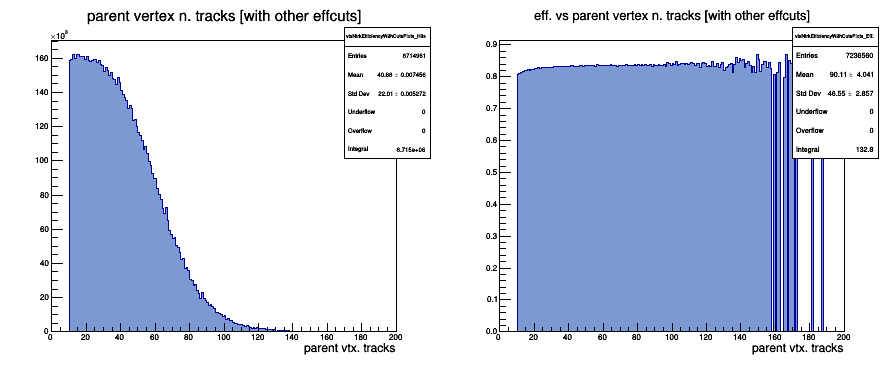

In [14]:
canvas = createTwoByNCanvas("vtxNtrkEfficiencyWithCutsPlotsCanvas", "Number of tracks in the vertices", 900, 400,
                   mainDir.GetTitle() + "/" + "vtxNtrkEfficiencyWithCutsPlots",
                   ["vtxNtrkEfficiencyWithCutsPlots_Hits",
                    "vtxNtrkEfficiencyWithCutsPlots_Eff.",])
canvas.Draw()

### Transverse momentum cut

The Phase-0 value for this cut was set to 1.0. This value seems to be alll right and was kept.

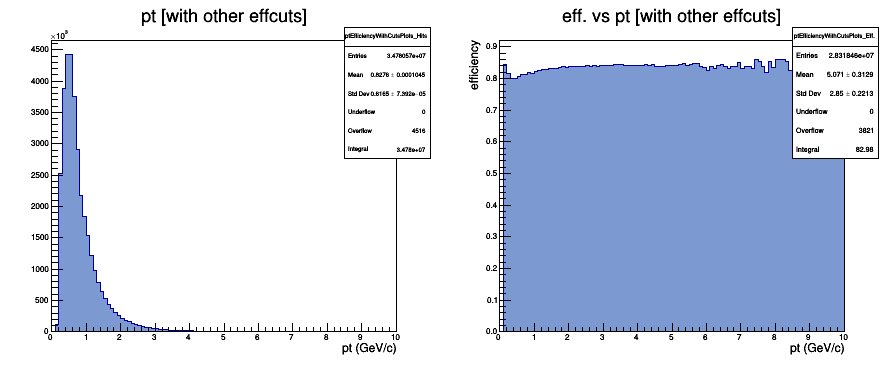

In [15]:
canvas = createTwoByNCanvas("ptEfficiencyWithCutsPlotsCanvas", "Pt. of the traj. meas. tracks", 900, 400,
                   mainDir.GetTitle() + "/" + "ptEfficiencyWithCutsPlots",
                   ["ptEfficiencyWithCutsPlots_Hits",
                    "ptEfficiencyWithCutsPlots_Eff.",])
canvas.Draw()

### Number of strip hits assertion

The distribution of the number of strip hits can be seen here:

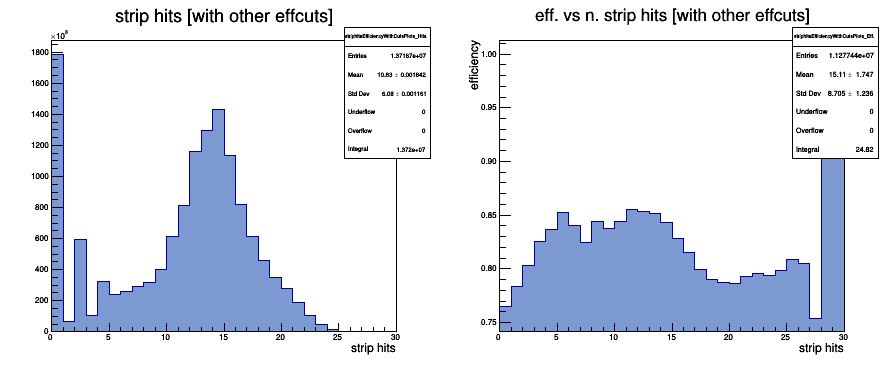

In [16]:
canvas = createTwoByNCanvas("striphitsEfficiencyWithCutsPlotsCanvas", "Strip hits for the traj. meas. tracks", 900, 400,
                   mainDir.GetTitle() + "/" + "striphitsEfficiencyWithCutsPlots",
                   ["striphitsEfficiencyWithCutsPlots_Hits",
                    "striphitsEfficiencyWithCutsPlots_Eff.",])
canvas.Draw()

### D0 and dz cuts

#### The Pixel Barrel layers
The threshold used for the barrel modules and the forward modules were selected separately, since the error of the trajectory measurements on the layer is more dependent on the Z track-vertex distance, and as for the traj. measurements on the disks the precision is more dependent on the XY distance.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: d0WithCutsPlotsAllLayersCanvas


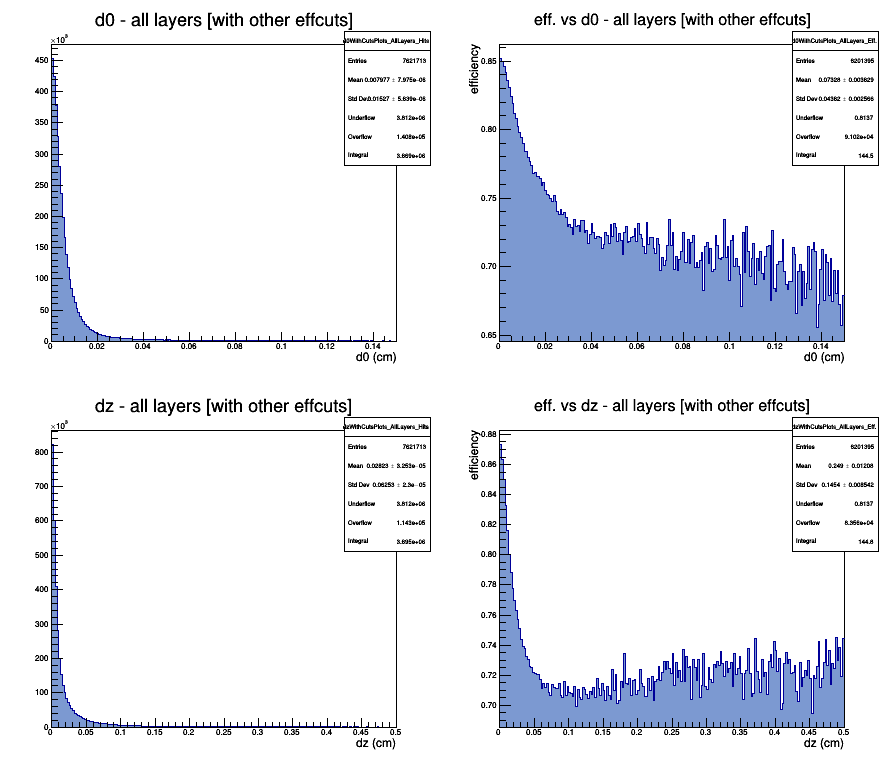

In [24]:
canvas = createTwoByNCanvas("d0WithCutsPlotsAllLayersCanvas", "D0 of the traj. meas. tracks on the layers", 900, 800,
                   mainDir.GetTitle(),
                   ["d0WithCutsPlots/d0WithCutsPlots_AllLayers_Hits",
                    "d0WithCutsPlots/d0WithCutsPlots_AllLayers_Eff.",
                    "dzWithCutsPlots/dzWithCutsPlots_AllLayers_Hits",
                    "dzWithCutsPlots/dzWithCutsPlots_AllLayers_Eff."])
canvas.Draw()

#### The Pixel Endcap modules

Warning in <TCanvas::Constructor>: Deleting canvas with same name: d0WithCutsPlotsAllDisksCanvas


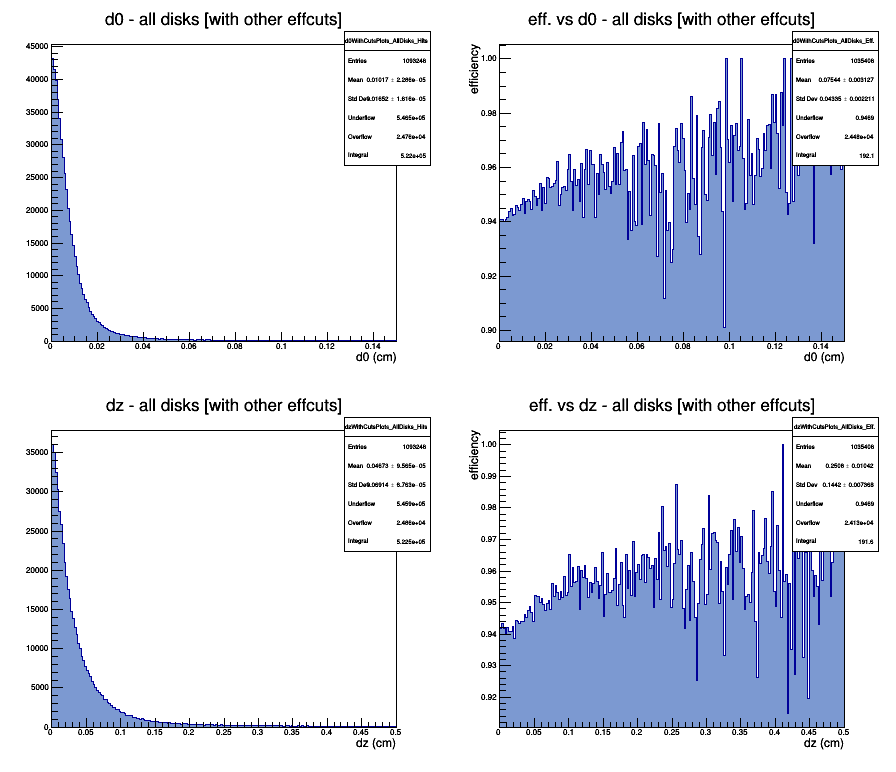

In [26]:
canvas = createTwoByNCanvas("d0WithCutsPlotsAllDisksCanvas", "D0 of the traj. meas. tracks on the disks", 900, 800,
                   mainDir.GetTitle(),
                   ["d0WithCutsPlots/d0WithCutsPlots_AllDisks_Hits",
                    "d0WithCutsPlots/d0WithCutsPlots_AllDisks_Eff.",
                    "dzWithCutsPlots/dzWithCutsPlots_AllDisks_Hits",
                    "dzWithCutsPlots/dzWithCutsPlots_AllDisks_Eff."])
canvas.Draw()

### Hit separation cuts

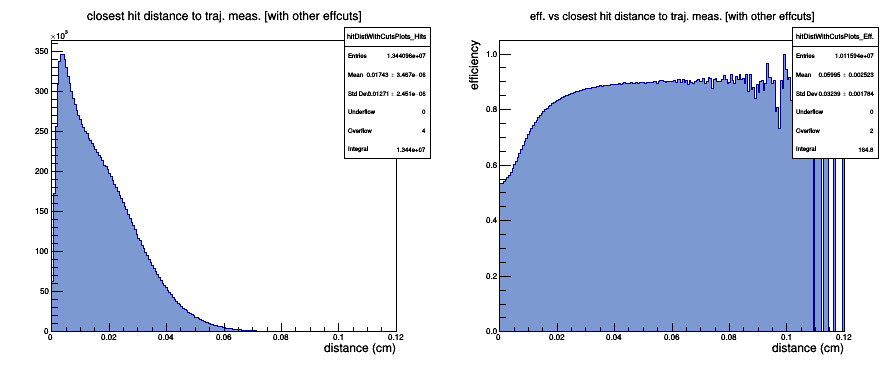

In [19]:
canvas = createTwoByNCanvas("hitDistWithCutsPlotsCanvas", "Distance of closest non-parent track", 900, 400,
                   mainDir.GetTitle() + "/" + "hitDistWithCutsPlots",
                   ["hitDistWithCutsPlots_Hits",
                    "hitDistWithCutsPlots_Eff.",])
canvas.Draw()

### Trajectory measurement cluster assignment distance

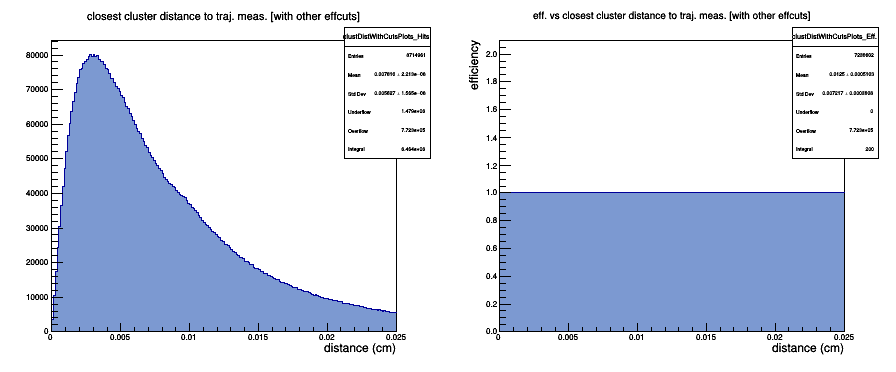

In [20]:
canvas = createTwoByNCanvas("clustDistWithCutsPlotsCanvas", "Traj. meas distance to the closest cluster", 900, 400,
                   mainDir.GetTitle() + "/" + "clustDistWithCutsPlots",
                   ["clustDistWithCutsPlots_Hits",
                    "clustDistWithCutsPlots_Eff.",])
canvas.Draw()